In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)

In [ ]:
import tensorflow.keras as keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


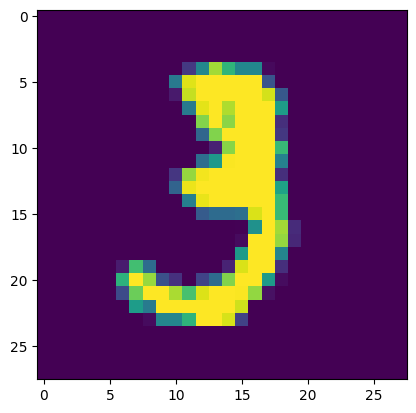

3


In [ ]:
plt.imshow(x_train[10])
plt.show()
print(y_train[10])

In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
# print(x_train[10])

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8427 - loss: 0.5297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9557 - loss: 0.1494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9687 - loss: 0.1051
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0831
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9803 - loss: 0.0674
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0484
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0416
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9892 - loss: 0.0361
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9899 - loss: 0.0332


In [ ]:
loss, acc=model.evaluate(x_test,y_test)
print(loss,acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9641 - loss: 0.1398
0.12183219194412231 0.9682999849319458


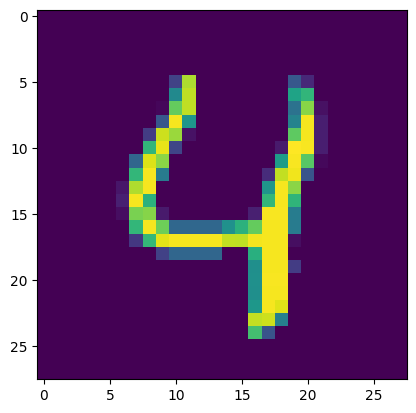

4


In [ ]:
 plt.imshow(x_test[4])
 plt.show()
 print(y_test[4])

In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(y_pred[4])

[0.01183387 0.01636845 0.1518036  0.00124079 0.9999961  0.02863836
 0.03151412 0.1799137  0.1444968  0.9930658 ]


In [ ]:
# model.predict() gives the prediction prob of each class for the data
pred_label=[np.argmax(y_pred[4])]

In [ ]:
pred_label

[4]

In [ ]:
pred_labels=[np.argmax(i) for i in y_pred]

In [ ]:
print(pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 3, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# !wget'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXBjvO-c-0fV7wL7IJojokKr6BVmx9XsG-FQ&s'

In [ ]:
import matplotlib.image as mpimage

In [ ]:
num=mpimage.imread('/content/number.png')

In [ ]:
type(num)

numpy.ndarray

In [ ]:
num.shape

(305, 165, 4)

In [ ]:
from PIL import ImageChops


In [ ]:
img=Image.open('/content/number.png')
img_resize=img.resize((28,28))

<function matplotlib.pyplot.show(close=None, block=None)>

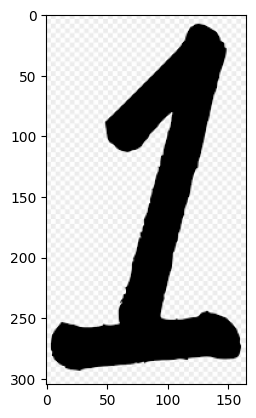

In [ ]:
plt.imshow(num)
plt.show

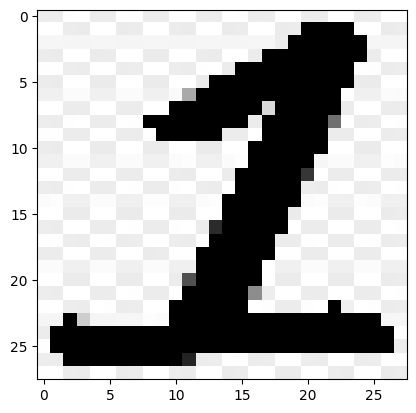

In [ ]:
plt.imshow(img_resize)
plt.show()

In [ ]:
img_resize.save('img_resize.png')

In [ ]:
import cv2
number=cv2.imread('/content/img_resize.png')


In [ ]:
type(number)


numpy.ndarray

In [ ]:
gray_img=cv2.cvtColor(number,cv2.COLOR_RGB2GRAY)

In [ ]:
type(gray_img)

numpy.ndarray

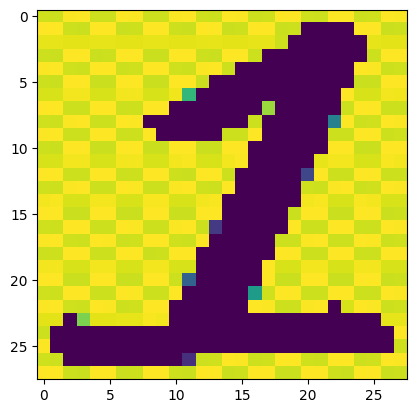

In [ ]:
plt.imshow(gray_img)

In [ ]:
cv2_imshow(gray_img)

In [ ]:
gray_img.shape
type(gray_img)
gray_img=gray_img/255
print(gray_img)

[[0.92941176 0.9254902  0.99607843 1.         0.9254902  0.9254902
  1.         0.99607843 0.9254902  0.9254902  0.99607843 1.
  0.92941176 0.9254902  1.         0.99607843 0.9254902  0.92941176
  1.         1.         0.92941176 0.9254902  1.         1.
  0.9254902  0.92941176 1.         0.99607843]
 [1.         1.         0.9254902  0.92156863 1.         1.
  0.92156863 0.9254902  1.         1.         0.9254902  0.92156863
  1.         1.         0.92156863 0.9254902  1.         1.
  0.92156863 0.9254902  0.         0.         0.         0.
  1.         1.         0.92156863 0.9254902 ]
 [0.96470588 0.96470588 0.96078431 0.96078431 0.96470588 0.96470588
  0.96078431 0.96078431 0.96470588 0.96470588 0.96078431 0.96078431
  0.96470588 0.96470588 0.96078431 0.96078431 0.96470588 0.96470588
  0.9254902  0.         0.         0.         0.         0.
  0.         0.96470588 0.96078431 0.96078431]
 [0.9254902  0.92156863 1.         1.         0.92156863 0.9254902
  1.         1.         0

In [ ]:

# x_test.shape
numb=np.expand_dims(gray_img,axis=0)
pred=model.predict(numb)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.5336575e-05, 3.7258485e-18, 1.0968326e-14, 1.1429545e-03,
        1.4248630e-24, 8.4563673e-01, 1.0000000e+00, 9.1051322e-10,
        9.1054189e-01, 6.8799832e-10]], dtype=float32)

In [ ]:
# pred=np.argmax(pred)
predicted_class = np.argmax(pred, axis=1)[0]


In [ ]:
predicted_class

6

In [ ]:
confusion_mat=confusion_matrix(y_test,pred_labels)

In [ ]:
print(confusion_mat)

tf.Tensor(
[[ 949    1    2    2    2    4    3    0    2   15]
 [   0 1111    1    9    0    1    3    1    9    0]
 [   2    1  991   16    3    1    2    7    9    0]
 [   0    0    2  989    0    4    0    4    4    7]
 [   1    0    3    1  950    2    7    5    0   13]
 [   1    0    2   19    0  856    6    1    4    3]
 [   4    2    3    1    3   10  932    1    2    0]
 [   1    0    9    6    2    0    1  984    2   23]
 [   0    1    4   16    2    3    1    2  941    4]
 [   0    2    0    6   14    2    0    4    2  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

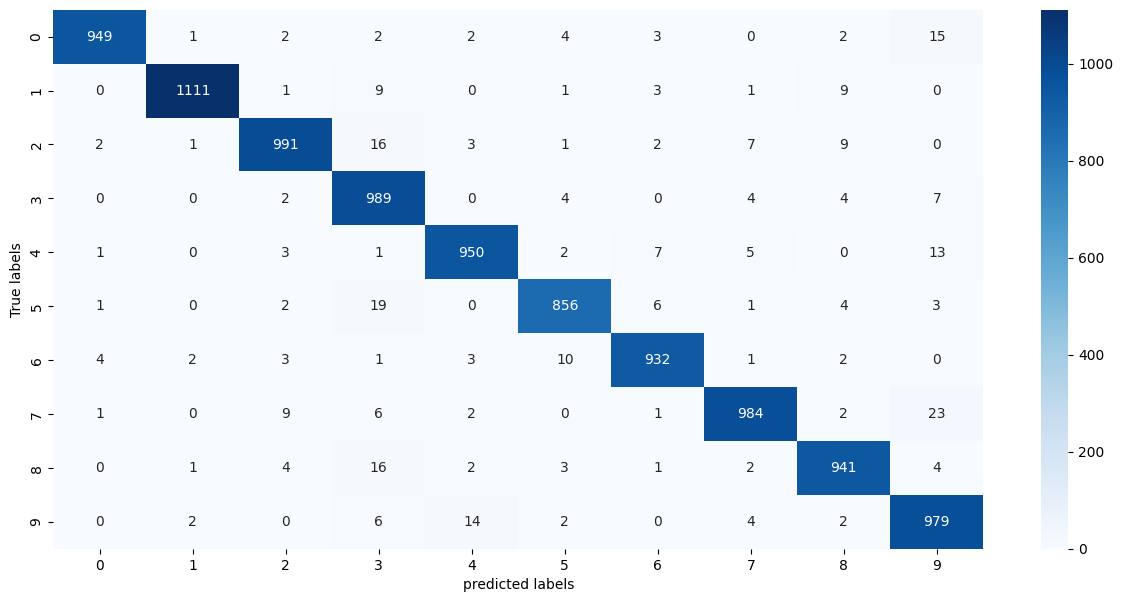

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat, annot=True,fmt='d',cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("predicted labels")


In [ ]:
img=cv2.imread('/content/download.png')

In [ ]:
type(img)

numpy.ndarray

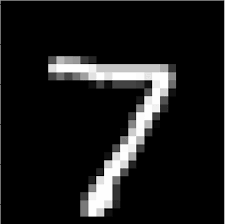

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(224, 225, 3)

In [ ]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY )

In [ ]:
resized_img=cv2.resize(gray_img,(28,28))

In [ ]:
resized_img.shape

(28, 28)

In [ ]:
cv2_imshow(resized_img)

In [ ]:
new_img=resized_img/255

In [ ]:
reshaped_img=np.reshape(new_img,(1,28,28))

In [ ]:
pred=model.predict(reshaped_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [ ]:
pred

array([[1.3260568e-07, 2.4196896e-05, 4.1982629e-03, 8.3916306e-01,
        2.2365866e-11, 3.1071758e-02, 1.5235262e-09, 9.9999624e-01,
        3.5651624e-03, 3.2956737e-01]], dtype=float32)

In [ ]:
output=np.argmax(pred)

In [ ]:
output

7

enter the image address to predict :/content/eight.jfif


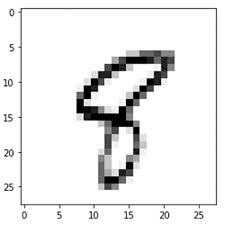

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[7.8126614e-06 4.2011727e-11 2.8737004e-20 2.0657389e-03 6.0160205e-37
  1.0000000e+00 1.0000000e+00 8.3787457e-15 4.6048971e-08 1.7523615e-08]]
the prediction of the model is: 5


In [ ]:
image=input("enter the image address to predict :")

img=cv2.imread(image)

cv2_imshow(img)

gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

resized_img=cv2.resize(gray_img,(28,28))

new_img=resized_img/255

reshaped_img=np.reshape(new_img,(1,28,28))

pred=model.predict(reshaped_img)
print(pred)
output=np.argmax(pred)

print("the prediction of the model is:",output)